# Roads

In [11]:
!pip install gdown

In [4]:
!gdown --id 1eQx7pd5yGf88RFlGGl2uPhhKJCSvG4sh

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1eQx7pd5yGf88RFlGGl2uPhhKJCSvG4sh
From (redirected): https://drive.google.com/uc?id=1eQx7pd5yGf88RFlGGl2uPhhKJCSvG4sh&confirm=t&uuid=2785cdd4-31cd-4906-ac0a-05dc818c67e6
To: /kaggle/working/roads_updated.zip
100%|██████████████████████████████████████| 2.87G/2.87G [00:32<00:00, 87.5MB/s]


In [5]:
!gdown --id 1Oce8YZMauJoEDmiXzeCoS1NyvGyE3b3a

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Oce8YZMauJoEDmiXzeCoS1NyvGyE3b3a
From (redirected): https://drive.google.com/uc?id=1Oce8YZMauJoEDmiXzeCoS1NyvGyE3b3a&confirm=t&uuid=15215a43-dc6c-40bf-887c-04fe5c08dfba
To: /kaggle/working/test_dataset.rar
100%|███████████████████████████████████████| 1.42G/1.42G [00:12<00:00, 115MB/s]


In [6]:
!apt install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 72 not upgraded.
Need to get 145 kB of archives.
After this operation, 339 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 unrar amd64 1:6.1.5-1 [145 kB]
Fetched 145 kB in 0s (381 kB/s)

78Selecting previously unselected package unrar.
(Reading database ... 122997 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a6.1.5-1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking unrar (1:6.1.5-1) ...
7Progress: [ 40%] [#######################...................................] 8Setting up unrar (1:6.1.5-1) ...
7Progress: [ 60%] [##################################..............

In [7]:
!unrar x "test_dataset.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from test_dataset.rar

Creating    final_dataset                                             OK
Creating    final_dataset/built_up                                    OK
Creating    final_dataset/built_up/input                              OK
Extracting  final_dataset/built_up/input/output_tile_0_3.tif             0  OK 
Extracting  final_dataset/built_up/input/output_tile_1_1.tif             1  OK 
Extracting  final_dataset/built_up/input/output_tile_1_2.tif               2  OK 
Extracting  final_dataset/built_up/input/output_tile_1_3.tif               3  OK 
Extracting  final_dataset/built_up/input/output_tile_2_0.tif             3  OK 
Extracting  final_dataset/built_up/input/output_tile_2_1.tif               4  OK 
Extracting  final_dataset/built_up/input/output_tile_2_2.tif               5  OK 
Extracting  final_dataset/built_up/input/output_tile_2_3.tif               6  OK 
Extracting  final_dat

In [ ]:
!pip install tensorflow keras numpy opencv-python rasterio matplotlib albumentations

In [ ]:
!pip install rasterio

In [10]:
!unzip /kaggle/working/roads_updated.zip

Archive:  /kaggle/working/roads_updated.zip
   creating: roads/input/
  inflating: roads/input/amirpur_output_tile_0_1.tif  
  inflating: roads/input/amirpur_output_tile_0_2.tif  
  inflating: roads/input/amirpur_output_tile_0_4.tif  
  inflating: roads/input/amirpur_output_tile_0_5.tif  
  inflating: roads/input/amirpur_output_tile_0_6.tif  
  inflating: roads/input/amirpur_output_tile_0_7.tif  
  inflating: roads/input/amirpur_output_tile_0_8.tif  
  inflating: roads/input/amirpur_output_tile_1_0.tif  
  inflating: roads/input/amirpur_output_tile_1_1.tif  
  inflating: roads/input/amirpur_output_tile_1_2.tif  
  inflating: roads/input/amirpur_output_tile_1_3.tif  
  inflating: roads/input/amirpur_output_tile_1_4.tif  
  inflating: roads/input/amirpur_output_tile_1_5.tif  
  inflating: roads/input/amirpur_output_tile_1_6.tif  
  inflating: roads/input/amirpur_output_tile_1_7.tif  
  inflating: roads/input/amirpur_output_tile_1_8.tif  
  inflating: roads/input/amirpur_output_tile_1_9.t

In [ ]:
!pip install -U git+https://github.com/qubvel-org/segmentation_models.pytorch
!pip install lightning albumentations

In [ ]:
import os
import glob
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import functional as TF
import segmentation_models_pytorch as smp
from torch.optim import lr_scheduler

# Dataset class for road segmentation
class RoadDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, scale_factor=0.5):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))  # Adjust extension if needed
        self.mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))  # Adjust extension if needed
        self.scale_factor = scale_factor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        # Ensure masks are binary (0 and 1)
        mask = (mask > 0).astype(np.uint8)  # Ensure mask is of integer type (0 or 1)

        # Downscale image and mask
        new_h = int(image.shape[0] * self.scale_factor)
        new_w = int(image.shape[1] * self.scale_factor)

        # Ensure dimensions are divisible by 32
        new_h += (32 - new_h % 32) % 32
        new_w += (32 - new_w % 32) % 32

        image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
        mask = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        # Add channel dimension to mask
        mask = np.expand_dims(mask, axis=0)

        return {
            "image": TF.to_tensor(image),
            "mask": torch.tensor(mask, dtype=torch.int64),  # Ensure mask is of integer type
        }

from sklearn.model_selection import train_test_split

image_dir = "/kaggle/working/final_dataset/roads/input"  
mask_dir = "/kaggle/working/final_dataset/roads/output"  

image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))
mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))

train_paths, val_paths = train_test_split(list(zip(image_paths,mask_paths)), test_size=0.2, random_state=42)

train_image_paths, train_mask_paths = zip(*train_paths)
val_image_paths, val_mask_paths = zip(*val_paths)

train_dataset = RoadDataset(image_dir, mask_dir) #Pass only image_dir as it's now handled internally
train_dataset.image_paths = list(train_image_paths)
train_dataset.mask_paths = list(train_mask_paths)
valid_dataset = RoadDataset(image_dir, mask_dir)
valid_dataset.image_paths = list(val_image_paths)
valid_dataset.mask_paths = list(val_mask_paths)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
valid_dataloader = DataLoader(valid_dataset, batch_size=8, shuffle=False, num_workers=4)

# Model hyperparameters
EPOCHS = 15
T_MAX = EPOCHS * len(train_dataloader)
model = smp.create_model("FPN", encoder_name="resnet34", in_channels=3, classes=1)

# PyTorch Lightning module
class RoadSegmentationModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = model
        self.loss_fn = smp.losses.DiceLoss(smp.losses.BINARY_MODE, from_logits=True)

    def forward(self, x):
        return self.model(x)

    def shared_step(self, batch):
        images, masks = batch["image"], batch["mask"]
        logits = self(images)
        loss = self.loss_fn(logits, masks)
        return loss, logits, masks

    def training_step(self, batch, batch_idx):
        loss, _, _ = self.shared_step(batch)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, logits, masks = self.shared_step(batch)
        prob_masks = logits.sigmoid()
        pred_masks = (prob_masks > 0.5).float()

        # Convert predicted masks to integer type (0 or 1) before passing to get_stats
        pred_masks = pred_masks.to(torch.int64)  # Convert to int64 for get_stats

        tp, fp, fn, tn = smp.metrics.get_stats(pred_masks, masks, mode="binary")
        iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_iou", iou, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=2e-4)
        scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=T_MAX, eta_min=1e-5)
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "step",
                "frequency": 1,
            },
        }

# Training
trainer = pl.Trainer(max_epochs=EPOCHS, log_every_n_steps=1)
road_model = RoadSegmentationModel()
trainer.fit(road_model, train_dataloader, valid_dataloader)

# Visualization function
def visualize_predictions(dataloader, model, n=5, scale_factor=4):
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            if idx >= n:
                break
            images = batch["image"]
            masks = batch["mask"]
            logits = model(images)
            prob_masks = logits.sigmoid()
            pred_masks = (prob_masks > 0.5).float()

            for i in range(min(len(images), n)):
                plt.figure(figsize=(12, 4))

                plt.subplot(1, 3, 1)
                # Upscale for display
                image = cv2.resize(images[i].permute(1, 2, 0).numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
                plt.imshow(image)
                plt.title("Input Image")

                plt.subplot(1, 3, 2)
                mask = cv2.resize(masks[i].squeeze().numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(mask, cmap="gray")
                plt.title("Ground Truth")

                plt.subplot(1, 3, 3)
                pred_mask = cv2.resize(pred_masks[i].squeeze().numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(pred_mask, cmap="gray")
                plt.title("Prediction")

                plt.show()

# Visualize predictions
visualize_predictions(valid_dataloader, road_model)


In [ ]:
torch.save(road_model.state_dict(), "/kaggle/working/road_trained_FPN.pth")

In [ ]:
#Boilerplate Code to Load Model PTH
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH, weights_only=True))
model.eval()

# Buildings

In [1]:
!pip install gdown segmentation_models_pytorch
!pip install -U git+https://github.com/qubvel-org/segmentation_models.pytorch
!pip install lightning albumentations
!pip install tensorflow keras numpy opencv-python rasterio matplotlib albumentations

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=e0b40ff43b8361c279e3992b31c96ffc1309a096f58b5b7f377bfbb4054f1458
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=fff2844f5158d5a0d739c8f30f11c2d46d124b6ebb263f47ac6b974a06d0feab
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientne

In [13]:
!gdown --id 1wfQg7trniQMsI3ec6v_Cm0VT9YgtM78o

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1wfQg7trniQMsI3ec6v_Cm0VT9YgtM78o

but Gdown can't. Please check connections and permissions.


In [3]:
!apt install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 72 not upgraded.
Need to get 145 kB of archives.
After this operation, 339 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 unrar amd64 1:6.1.5-1 [145 kB]
Fetched 145 kB in 1s (222 kB/s)

78Selecting previously unselected package unrar.
(Reading database ... 122997 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a6.1.5-1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking unrar (1:6.1.5-1) ...
7Progress: [ 40%] [#######################...................................] 8Setting up unrar (1:6.1.5-1) ...
7Progress: [ 60%] [##################################..............

In [ ]:
!unrar x /kaggle/working/test_dataset.rar

In [14]:
import os
import glob
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import functional as TF
import segmentation_models_pytorch as smp
from torch.optim import lr_scheduler

In [19]:
class BuildingDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, scale_factor=0.25):
        """
        Dataset for Building segmentation.
        
        Args:
            image_dir (str): Directory containing input images.
            mask_dir (str): Directory containing segmentation masks.
            transform (callable, optional): Data augmentation transformations.
            scale_factor (float, optional): Scaling factor for resizing images and masks.
        """
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))
        self.mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))
        self.scale_factor = scale_factor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and mask
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        # Ensure masks are binary (0 and 1)
        mask = (mask > 0).astype(np.uint8)

        # Downscale image and mask
        original_h, original_w = image.shape[:2]
        new_h = int(original_h * self.scale_factor)
        new_w = int(original_w * self.scale_factor)

        # Ensure dimensions are divisible by 32
        new_h += (32 - new_h % 32) % 32
        new_w += (32 - new_w % 32) % 32

        image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
        mask = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

        # Apply transformations if provided
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        # Normalize image (convert to [0, 1] range)
        image = TF.to_tensor(image).float()

        # Add channel dimension to mask if missing
        if len(mask.shape) == 2:
            mask = np.expand_dims(mask, axis=0)

        # Convert mask to tensor (integer type for compatibility)
        mask = torch.tensor(mask, dtype=torch.int64)  # Corrected dtype

        return {
            "image": image,
            "mask": mask
        }


In [20]:
class BuildingSegmentationModel(pl.LightningModule):
    def __init__(self, encoder_name="resnet34", in_channels=3, classes=1): #Add parameters to __init__
        super().__init__()
        self.model = smp.create_model("FPN", encoder_name=encoder_name, in_channels=in_channels, classes=classes)
        self.loss_fn = smp.losses.DiceLoss(smp.losses.BINARY_MODE, from_logits=True)

    def forward(self, x):
        return self.model(x)

    def shared_step(self, batch):
        images, masks = batch["image"], batch["mask"]
        logits = self(images)
        loss = self.loss_fn(logits, masks)
        return loss, logits, masks

    def training_step(self, batch, batch_idx):
        loss, _, _ = self.shared_step(batch)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, logits, masks = self.shared_step(batch)
        prob_masks = logits.sigmoid()
        pred_masks = (prob_masks > 0.5).float()
        pred_masks = pred_masks.to(torch.int64)
        tp, fp, fn, tn = smp.metrics.get_stats(pred_masks, masks, mode="binary")
        iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_iou", iou, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=2e-4)
        #T_MAX is now handled in the training loop
        return {"optimizer": optimizer}

In [ ]:
from sklearn.model_selection import train_test_split

image_dir = "/kaggle/working/final_dataset/built_up/input"  
mask_dir = "/kaggle/working/final_dataset/built_up/outputs"  

image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))
mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))

train_paths, val_paths = train_test_split(list(zip(image_paths,mask_paths)), test_size=0.2, random_state=42)

train_image_paths, train_mask_paths = zip(*train_paths)
val_image_paths, val_mask_paths = zip(*val_paths)

train_dataset = RoadDataset(image_dir, mask_dir) #Pass only image_dir as it's now handled internally
train_dataset.image_paths = list(train_image_paths)
train_dataset.mask_paths = list(train_mask_paths)
valid_dataset = RoadDataset(image_dir, mask_dir)
valid_dataset.image_paths = list(val_image_paths)
valid_dataset.mask_paths = list(val_mask_paths)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
valid_dataloader = DataLoader(valid_dataset, batch_size=8, shuffle=False, num_workers=4)

# Model hyperparameters
EPOCHS = 25
T_MAX = EPOCHS * len(train_dataloader)
model = smp.create_model("FPN", encoder_name="resnet34", in_channels=3, classes=1)

# Training
trainer = pl.Trainer(max_epochs=EPOCHS, log_every_n_steps=1)
road_model = RoadSegmentationModel()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = torch.nn.DataParallel(model, device_ids = [0,1]).to(device)
trainer.fit(road_model, train_dataloader, valid_dataloader)

# Visualization function
def visualize_predictions(dataloader, model, n=5, scale_factor=4):
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            if idx >= n:
                break
            images = batch["image"]
            masks = batch["mask"]
            logits = model(images)
            prob_masks = logits.sigmoid()
            pred_masks = (prob_masks > 0.5).float()

            for i in range(min(len(images), n)):
                plt.figure(figsize=(12, 4))

                plt.subplot(1, 3, 1)
                # Upscale for display
                image = cv2.resize(images[i].permute(1, 2, 0).numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
                plt.imshow(image)
                plt.title("Input Image")

                plt.subplot(1, 3, 2)
                mask = cv2.resize(masks[i].squeeze().numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(mask, cmap="gray")
                plt.title("Ground Truth")

                plt.subplot(1, 3, 3)
                pred_mask = cv2.resize(pred_masks[i].squeeze().numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(pred_mask, cmap="gray")
                plt.title("Prediction")

                plt.show()

# Visualize predictions
visualize_predictions(valid_dataloader, road_model)

In [ ]:
def single_image_inference(model, image_path, scale_factor=0.25):
    model.eval()
    with torch.no_grad():
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Downscale image (same as in your dataset)
        new_h = int(image.shape[0] * scale_factor)
        new_w = int(image.shape[1] * scale_factor)
        new_h = (new_h + 31) // 32 * 32
        new_w = (new_w + 31) // 32 * 32
        image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

        # Convert to tensor and add batch dimension
        image_tensor = TF.to_tensor(image).unsqueeze(0)

        # Perform inference
        logits = model(image_tensor)
        prob_mask = logits.sigmoid()
        pred_mask = (prob_mask > 0.5).float().squeeze().cpu().numpy()  # Remove batch dimension and move to CPU

        # Upscale the prediction mask for better visualization
        pred_mask = cv2.resize(pred_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
        
        return image, pred_mask

#Load your trained model
road_model = RoadSegmentationModel()
road_model.load_state_dict(torch.load("/kaggle/working/buildings_trained_FPN.pth", weights_only=True))

# Path to your image
image_path = "/kaggle/working/final_dataset/built_up/input/output_tile_2_2.tif"  # Replace with the correct path

# Perform inference
image, pred_mask = single_image_inference(road_model, image_path)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Input Image")

plt.subplot(1, 2, 2)
plt.imshow(pred_mask, cmap="gray")
plt.title("Prediction")

plt.show()

In [ ]:
torch.save(road_model.state_dict(), "/kaggle/working/buildings_trained_FPN.pth")

## Building Model Specialized From Base Weights

In [23]:
class BuildingDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, scale_factor=0.25):
        """
        Dataset for Building segmentation.
        
        Args:
            image_dir (str): Directory containing input images.
            mask_dir (str): Directory containing segmentation masks.
            transform (callable, optional): Data augmentation transformations.
            scale_factor (float, optional): Scaling factor for resizing images and masks.
        """
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))
        self.mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))
        self.scale_factor = scale_factor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and mask
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        # Ensure masks are binary (0 and 1)
        mask = (mask > 0).astype(np.uint8)

        # Downscale image and mask
        original_h, original_w = image.shape[:2]
        new_h = int(original_h * self.scale_factor)
        new_w = int(original_w * self.scale_factor)

        # Ensure dimensions are divisible by 32
        new_h += (32 - new_h % 32) % 32
        new_w += (32 - new_w % 32) % 32

        image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
        mask = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

        # Apply transformations if provided
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        # Normalize image (convert to [0, 1] range)
        image = TF.to_tensor(image).float()

        # Add channel dimension to mask if missing
        if len(mask.shape) == 2:
            mask = np.expand_dims(mask, axis=0)

        # Convert mask to tensor (integer type for compatibility)
        mask = torch.tensor(mask, dtype=torch.int64)  # Corrected dtype

        return {
            "image": image,
            "mask": mask
        }


In [24]:
class BuildingSegmentationModelWithBase(pl.LightningModule):
    def __init__(self, encoder_name="resnet34", in_channels=3, classes=1, base_weights_path=None): 
        """
        Initializes the BuildingSegmentationModel with optional base weights for fine-tuning.
        
        Args:
            encoder_name (str): Name of the encoder backbone.
            in_channels (int): Number of input channels.
            classes (int): Number of output classes.
            base_weights_path (str, optional): Path to pre-trained weights (.pth file). Default is None.
        """
        super().__init__()
        self.model = smp.create_model("FPN", encoder_name=encoder_name, in_channels=in_channels, classes=classes)
        self.loss_fn = smp.losses.DiceLoss(smp.losses.BINARY_MODE, from_logits=True)

        # Load base weights if provided
        if base_weights_path:
            print(f"Loading base weights from {base_weights_path}")
            base_weights = torch.load(base_weights_path, map_location=torch.device('cpu'))
            self.model.load_state_dict(base_weights, strict=False)  # Allow partial loading

    def forward(self, x):
        return self.model(x)

    def shared_step(self, batch):
        images, masks = batch["image"], batch["mask"]
        logits = self(images)
        loss = self.loss_fn(logits, masks)
        return loss, logits, masks

    def training_step(self, batch, batch_idx):
        loss, _, _ = self.shared_step(batch)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, logits, masks = self.shared_step(batch)
        prob_masks = logits.sigmoid()
        pred_masks = (prob_masks > 0.5).float()
        pred_masks = pred_masks.to(torch.int64)
        tp, fp, fn, tn = smp.metrics.get_stats(pred_masks, masks, mode="binary")
        iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_iou", iou, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=2e-4)
        return {"optimizer": optimizer}


Loading base weights from /kaggle/working/buildings_trained_FPN.pth


/tmp/ipykernel_23/2522564200.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  base_weights = torch.load(base_weights_path, map_location=torch.device('cpu'))


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

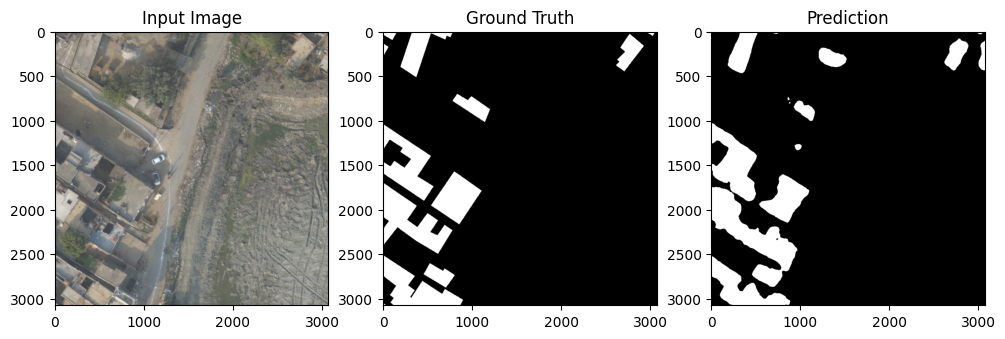

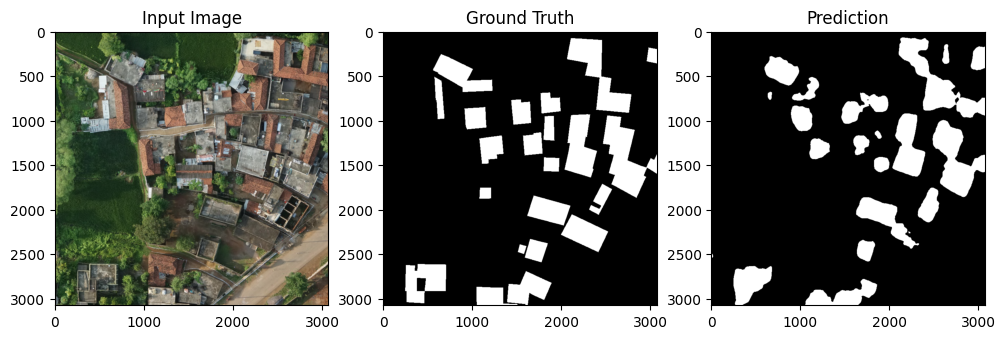

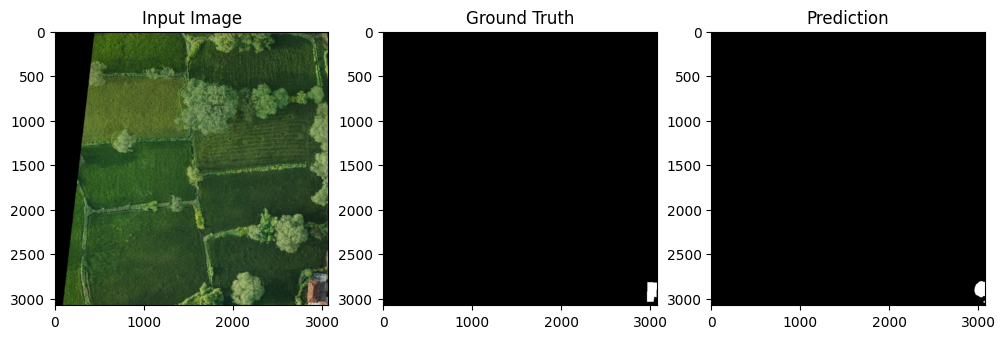

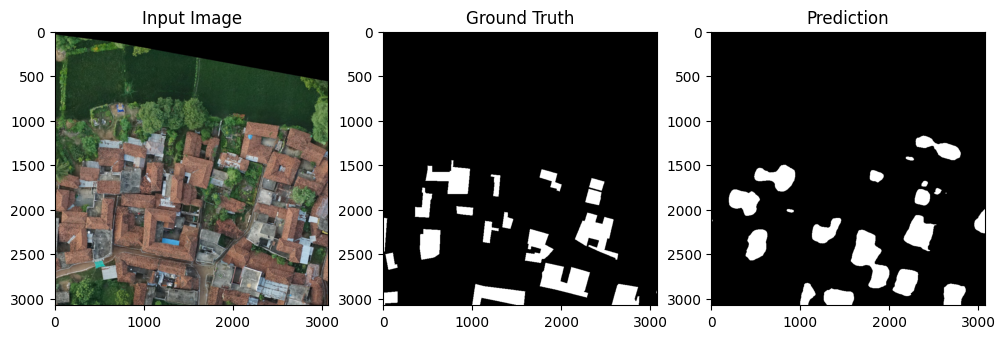

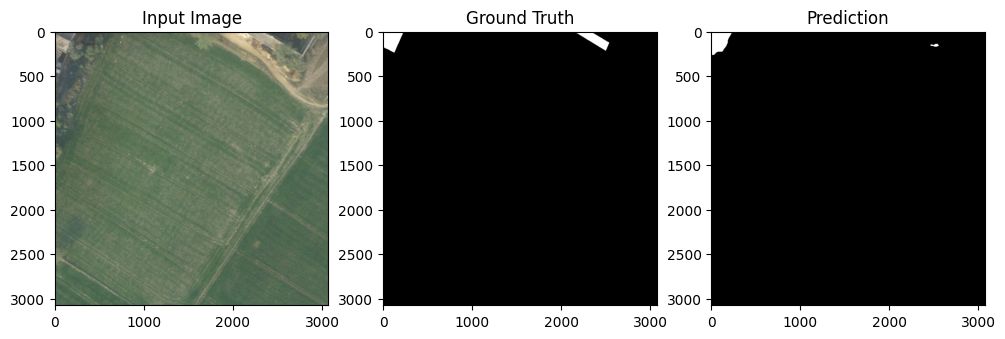

In [ ]:
from sklearn.model_selection import train_test_split

image_dir = "/kaggle/input/rooftypesegmentation/rcc_builtup/input"
mask_dir = "/kaggle/input/rooftypesegmentation/rcc_builtup/output"

image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))
mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))

train_paths, val_paths = train_test_split(list(zip(image_paths,mask_paths)), test_size=0.2, random_state=42)

train_image_paths, train_mask_paths = zip(*train_paths)
val_image_paths, val_mask_paths = zip(*val_paths)

train_dataset = BuildingDataset(image_dir, mask_dir) #Pass only image_dir as it's now handled internally
train_dataset.image_paths = list(train_image_paths)
train_dataset.mask_paths = list(train_mask_paths)
valid_dataset = BuildingDataset(image_dir, mask_dir)
valid_dataset.image_paths = list(val_image_paths)
valid_dataset.mask_paths = list(val_mask_paths)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
valid_dataloader = DataLoader(valid_dataset, batch_size=8, shuffle=False, num_workers=4)

# Model hyperparameters
EPOCHS = 50
T_MAX = EPOCHS * len(train_dataloader)

# Training
trainer = pl.Trainer(
    max_epochs=EPOCHS,
    log_every_n_steps=1,
    devices="auto",  # Automatically select available GPUs
    accelerator="gpu",  # Use GPU for training
)

# Initialize the model with base weights
base_weights_path = "/kaggle/working/buildings_trained_FPN.pth"
rcc_model = BuildingSegmentationModelWithBase(
    encoder_name="resnet34",
    in_channels=3,
    classes=1,
    base_weights_path=base_weights_path
)

# Train the model
trainer.fit(rcc_model, train_dataloader, valid_dataloader)

# Visualization function
def visualize_predictions(dataloader, model, n=5, scale_factor=4):
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            if idx >= n:
                break
            images = batch["image"].to(model.device)  # Ensure images are on the correct device
            masks = batch["mask"]
            logits = model(images)
            prob_masks = logits.sigmoid()
            pred_masks = (prob_masks > 0.5).float()

            for i in range(min(len(images), n)):
                plt.figure(figsize=(12, 4))

                plt.subplot(1, 3, 1)
                # Upscale for display
                image = images[i].permute(1, 2, 0).cpu().numpy()  # Move to CPU for visualization
                image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
                plt.imshow(image)
                plt.title("Input Image")

                plt.subplot(1, 3, 2)
                mask = masks[i].squeeze().cpu().numpy()  # Move to CPU for visualization
                mask = cv2.resize(mask, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(mask, cmap="gray")
                plt.title("Ground Truth")

                plt.subplot(1, 3, 3)
                pred_mask = pred_masks[i].squeeze().cpu().numpy()  # Move to CPU for visualization
                pred_mask = cv2.resize(pred_mask, (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(pred_mask, cmap="gray")
                plt.title("Prediction")

                plt.show()

# Visualize predictions
visualize_predictions(valid_dataloader, rcc_model)

In [27]:
torch.save(rcc_model.state_dict(), "/kaggle/working/rcc_trained_FPN.pth")

# Waterbodies

In [ ]:
!pip install gdown segmentation_models_pytorch
!pip install -U git+https://github.com/qubvel-org/segmentation_models.pytorch
!pip install lightning albumentations
!pip install tensorflow keras numpy opencv-python rasterio matplotlib albumentations

In [ ]:
!gdown --id 1Oce8YZMauJoEDmiXzeCoS1NyvGyE3b3a

In [ ]:
!apt install unrar

In [ ]:
!unrar x /kaggle/working/test_dataset.rar

In [ ]:
import os
import glob
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import functional as TF
import segmentation_models_pytorch as smp
from torch.optim import lr_scheduler

In [ ]:
# Dataset class for road segmentation
class RoadDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, scale_factor=0.25):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))  # Adjust extension if needed
        self.mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))  # Adjust extension if needed
        self.scale_factor = scale_factor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.mask_paths[idx], cv2.IMREAD_GRAYSCALE)

        # Ensure masks are binary (0 and 1)
        mask = (mask > 0).astype(np.uint8)  # Ensure mask is of integer type (0 or 1)

        # Downscale image and mask
        new_h = int(image.shape[0] * self.scale_factor)
        new_w = int(image.shape[1] * self.scale_factor)

        # Ensure dimensions are divisible by 32
        new_h += (32 - new_h % 32) % 32
        new_w += (32 - new_w % 32) % 32

        image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
        mask = cv2.resize(mask, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']

        # Add channel dimension to mask
        mask = np.expand_dims(mask, axis=0)

        return {
            "image": TF.to_tensor(image),
            "mask": torch.tensor(mask, dtype=torch.int64),  # Ensure mask is of integer type
        }

In [ ]:
from sklearn.model_selection import train_test_split

image_dir = "/kaggle/working/final_dataset/water_bodies/input"  
mask_dir = "/kaggle/working/final_dataset/water_bodies/output"  

image_paths = sorted(glob.glob(os.path.join(image_dir, "*.tif")))
mask_paths = sorted(glob.glob(os.path.join(mask_dir, "*.tif")))

train_paths, val_paths = train_test_split(list(zip(image_paths,mask_paths)), test_size=0.2, random_state=42)

train_image_paths, train_mask_paths = zip(*train_paths)
val_image_paths, val_mask_paths = zip(*val_paths)

train_dataset = RoadDataset(image_dir, mask_dir) #Pass only image_dir as it's now handled internally
train_dataset.image_paths = list(train_image_paths)
train_dataset.mask_paths = list(train_mask_paths)
valid_dataset = RoadDataset(image_dir, mask_dir)
valid_dataset.image_paths = list(val_image_paths)
valid_dataset.mask_paths = list(val_mask_paths)

train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
valid_dataloader = DataLoader(valid_dataset, batch_size=8, shuffle=False, num_workers=4)

# Model hyperparameters
EPOCHS = 25
T_MAX = EPOCHS * len(train_dataloader)
model = smp.create_model("FPN", encoder_name="resnet34", in_channels=3, classes=1)

# PyTorch Lightning module
class RoadSegmentationModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = model
        self.loss_fn = smp.losses.DiceLoss(smp.losses.BINARY_MODE, from_logits=True)

    def forward(self, x):
        return self.model(x)

    def shared_step(self, batch):
        images, masks = batch["image"], batch["mask"]
        logits = self(images)
        loss = self.loss_fn(logits, masks)
        return loss, logits, masks

    def training_step(self, batch, batch_idx):
        loss, _, _ = self.shared_step(batch)
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, logits, masks = self.shared_step(batch)
        prob_masks = logits.sigmoid()
        pred_masks = (prob_masks > 0.5).float()

        # Convert predicted masks to integer type (0 or 1) before passing to get_stats
        pred_masks = pred_masks.to(torch.int64)  # Convert to int64 for get_stats

        tp, fp, fn, tn = smp.metrics.get_stats(pred_masks, masks, mode="binary")
        iou = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_iou", iou, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=2e-4)
        scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=T_MAX, eta_min=1e-5)
        return {
            "optimizer": optimizer,
            "lr_scheduler": {
                "scheduler": scheduler,
                "interval": "step",
                "frequency": 1,
            },
        }

# Training
trainer = pl.Trainer(max_epochs=EPOCHS, log_every_n_steps=1)
road_model = RoadSegmentationModel()
trainer.fit(road_model, train_dataloader, valid_dataloader)

# Visualization function
def visualize_predictions(dataloader, model, n=5, scale_factor=4):
    model.eval()
    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            if idx >= n:
                break
            images = batch["image"]
            masks = batch["mask"]
            logits = model(images)
            prob_masks = logits.sigmoid()
            pred_masks = (prob_masks > 0.5).float()

            for i in range(min(len(images), n)):
                plt.figure(figsize=(12, 4))

                plt.subplot(1, 3, 1)
                # Upscale for display
                image = cv2.resize(images[i].permute(1, 2, 0).numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
                plt.imshow(image)
                plt.title("Input Image")

                plt.subplot(1, 3, 2)
                mask = cv2.resize(masks[i].squeeze().numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(mask, cmap="gray")
                plt.title("Ground Truth")

                plt.subplot(1, 3, 3)
                pred_mask = cv2.resize(pred_masks[i].squeeze().numpy(), (0, 0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
                plt.imshow(pred_mask, cmap="gray")
                plt.title("Prediction")

                plt.show()

# Visualize predictions
visualize_predictions(valid_dataloader, road_model)

In [ ]:
torch.save(road_model.state_dict(), "/kaggle/working/waterbodies_trained_FPN.pth")